In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

(1012, 1012, 3)


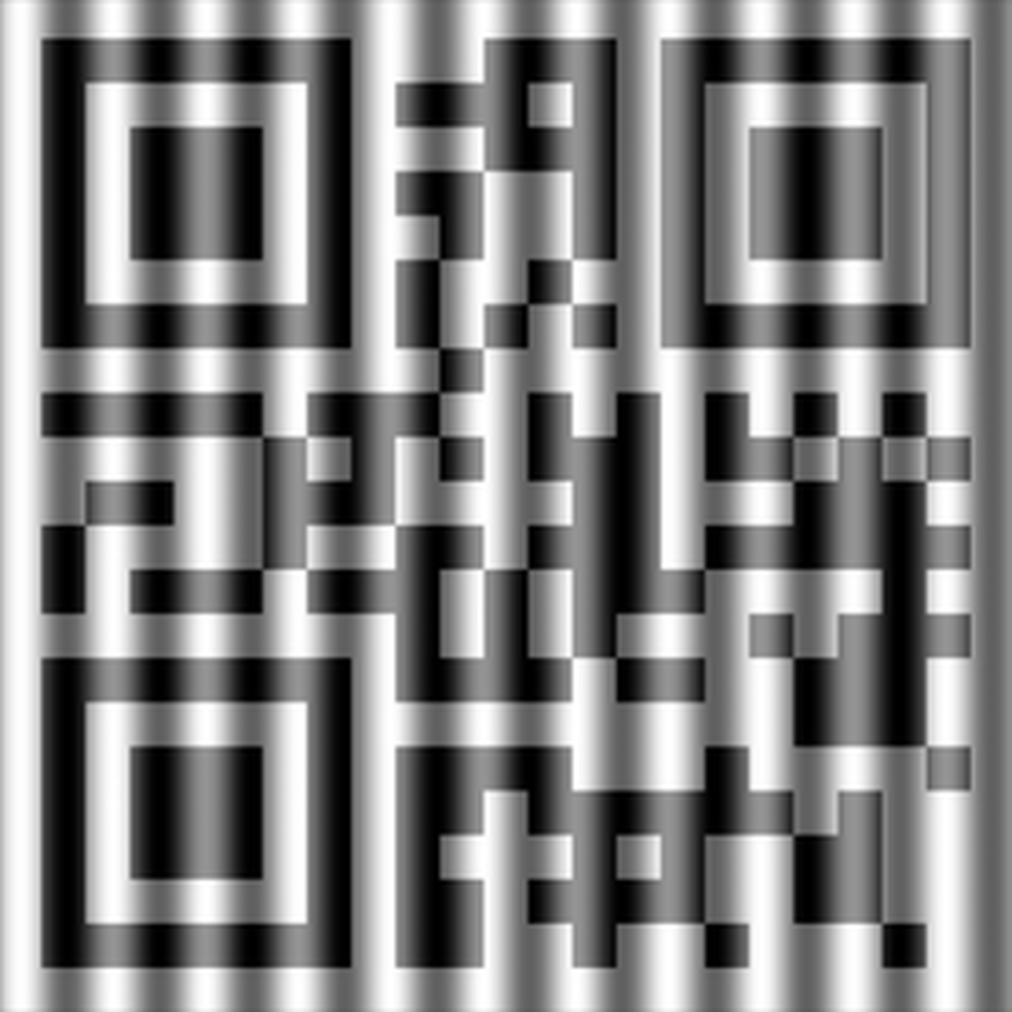

In [ ]:
img = cv2.imread("image.png")
print(img.shape)
cv2_imshow(img)

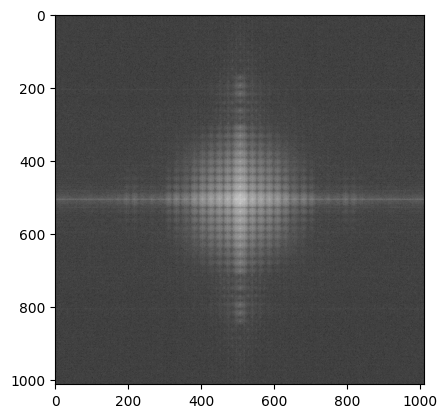

In [ ]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGRA2GRAY)
dft_img = np.fft.fft2(img_gray)
dft_img_shift = np.fft.fftshift(dft_img)
plt.imshow(np.log(1+np.abs(dft_img_shift)), cmap = 'gray');

In [ ]:
def give_me_two_boxes_mask(mask_size, square_size, distance_from_center):
    # Create a zero-filled numpy array with the specified size
    mask = np.zeros(mask_size, dtype=np.uint8)

    # Calculate the center of the mask
    cy, cx = mask_size[0] // 2, mask_size[1] // 2

    # Define the half size of the square
    half_square_size = square_size // 2

    # Coordinates for the left box
    top_left_left_box = (cx - distance_from_center - half_square_size, cy - half_square_size)
    bottom_right_left_box = (cx - distance_from_center + half_square_size, cy + half_square_size)

    # Coordinates for the right box
    top_left_right_box = (cx + distance_from_center - half_square_size, cy - half_square_size)
    bottom_right_right_box = (cx + distance_from_center + half_square_size, cy + half_square_size)

    # Draw the left box
    cv2.rectangle(mask, top_left_left_box, bottom_right_left_box, 255, -1)

    # Draw the right box
    cv2.rectangle(mask, top_left_right_box, bottom_right_right_box, 255, -1)

    return mask

def try_highpass(dft_img,  square_size, distance_from_center, gaussian: bool = False, keep_dc: bool = False):
    mask = ~give_me_two_boxes_mask(dft_img.shape, square_size, distance_from_center)
    if (gaussian): mask = cv2.GaussianBlur(mask, (21,21), 0)
    if (keep_dc): mask[dft_img.shape[0] // 2, dft_img.shape[1]//2] = 150
    dft_img_shifted = np.fft.fftshift(dft_img)
    dft_img_shifted_highpass = np.multiply(dft_img_shifted, mask)
    plot_shifted_fft_and_ifft(dft_img_shifted_highpass)
    return dft_img_shifted_highpass

def plot_shifted_fft_and_ifft(dft_img_shifted):
    img = np.fft.ifft2(np.fft.ifftshift(dft_img_shifted))
    fig, (ax1, ax2) = plt.subplots(figsize=(10, 5), nrows=1, ncols=2)
    ax1.set(yticks=[0, img.shape[0]//2, img.shape[0] - 1], yticklabels=[-img.shape[0]//2, 0, img.shape[0]//2 - 1]);
    ax1.set(xticks=[0, img.shape[1]//2, img.shape[1] - 1], xticklabels=[-img.shape[1]//2, 0, img.shape[1]//2 - 1]);
    ax1.imshow(np.abs(dft_img_shifted)**0.1, cmap = 'gray');
    ax2.imshow(np.abs(img), cmap = 'gray')

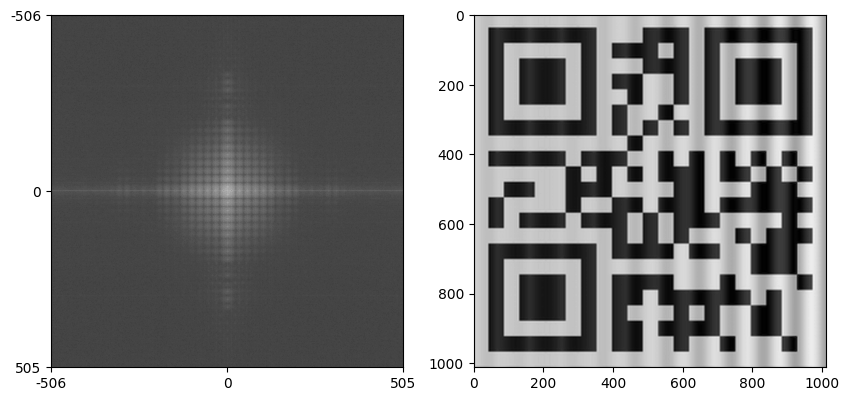

In [ ]:
new_dft_img = try_highpass(dft_img, 1, 11, gaussian=False, keep_dc=True)

In [ ]:
img = np.abs(np.fft.ifft2(np.fft.ifftshift(new_dft_img)))

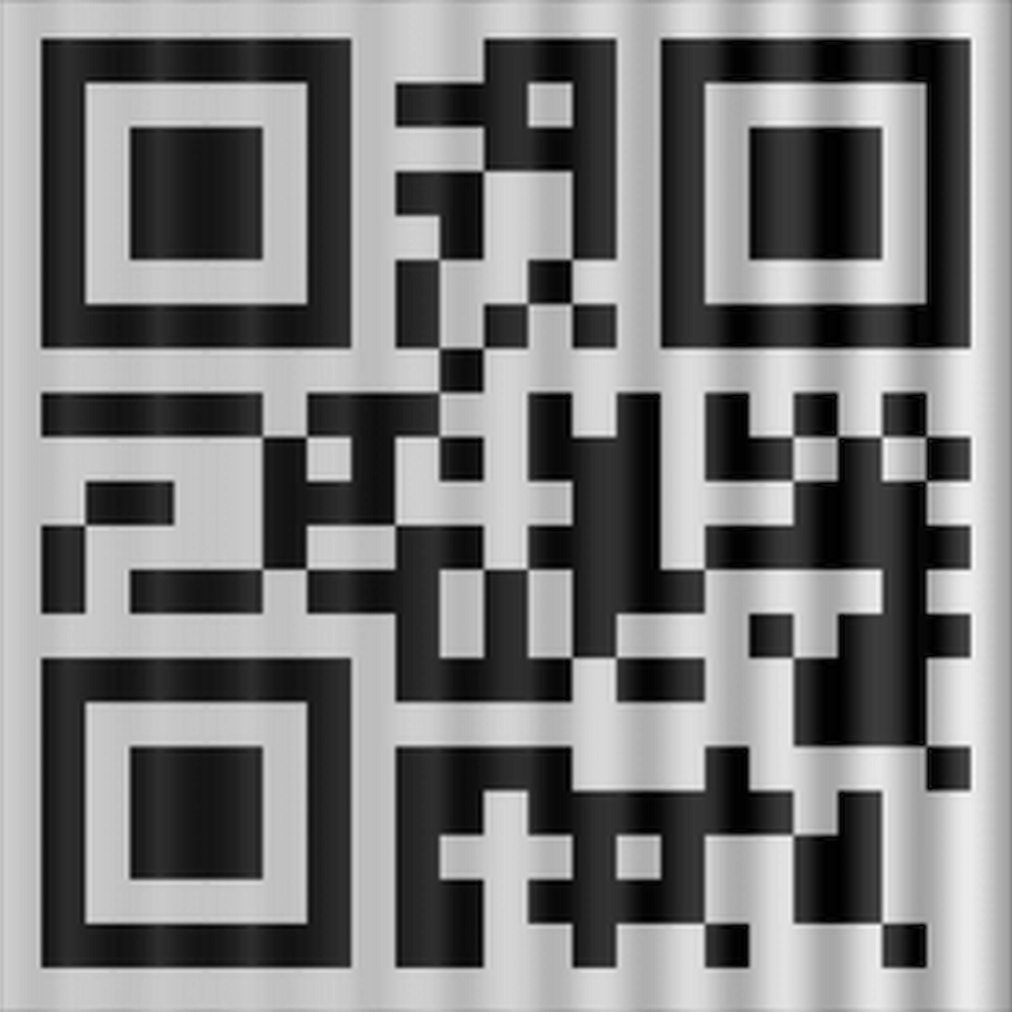

In [ ]:
normalized_img_cv = cv2.normalize(img, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
cv2_imshow(normalized_img_cv)

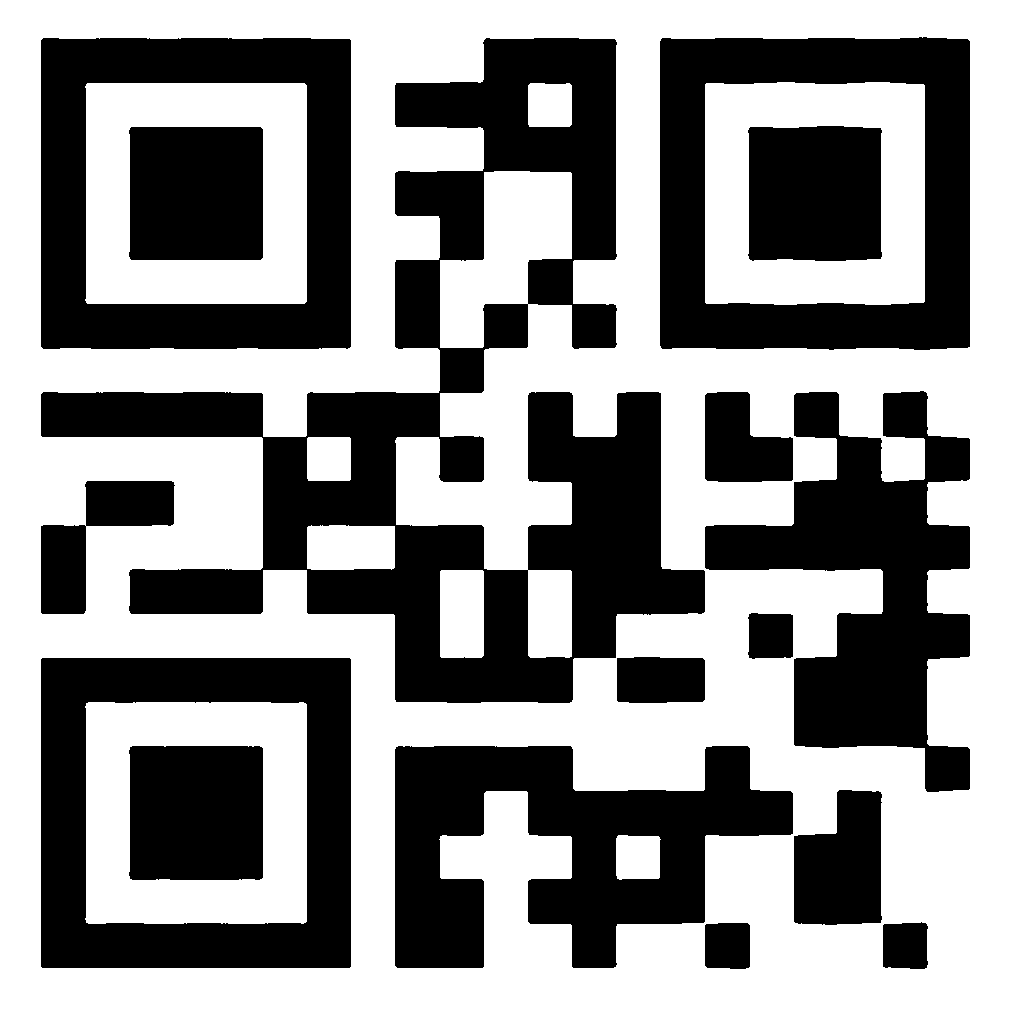

In [ ]:
ret,thresh1 = cv2.threshold(normalized_img_cv,120,255,cv2.THRESH_BINARY)
cv2_imshow(thresh1)

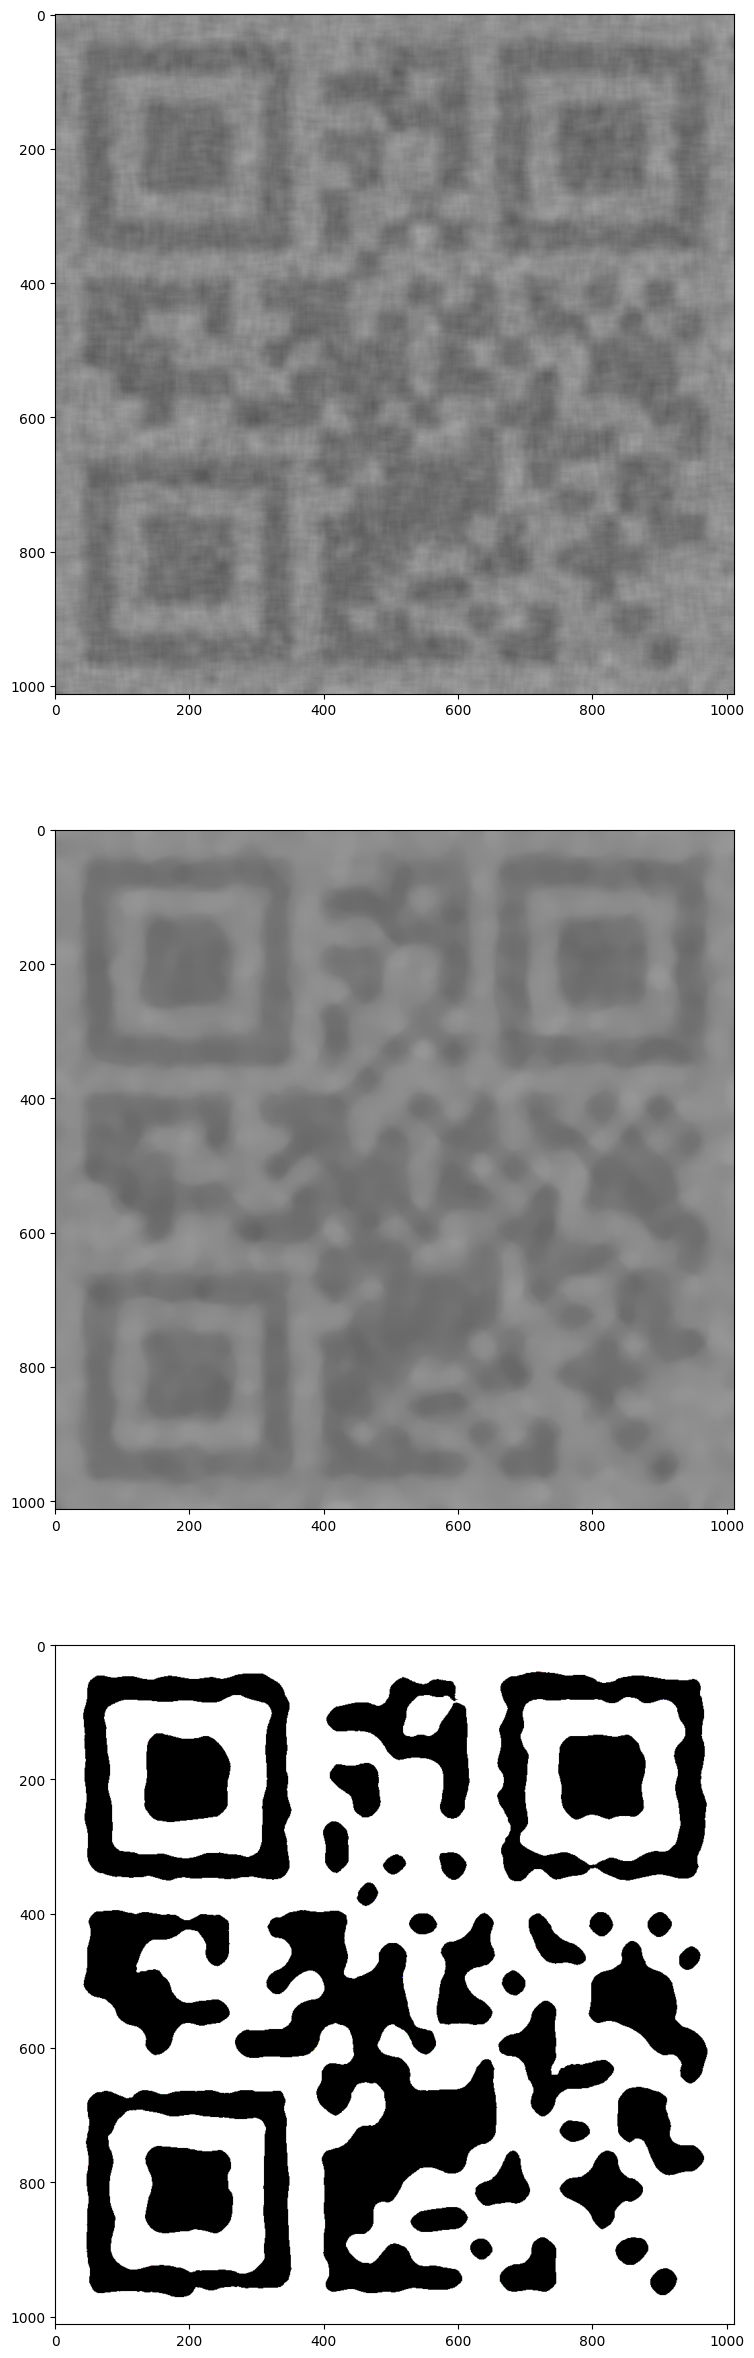

In [ ]:
from PIL import Image
import cv2
import numpy as np

# Load the image with noise
img = cv2.imread("12-mal7-w-felfel.png", cv2.COLOR_BGRA2GRAY)

# Apply larger average filter followed by median filter to further reduce noise
average_img = cv2.blur(img, (21, 21))  # Larger average kernel

final_filtered_img = cv2.medianBlur(average_img, 31)  # Larger median kernel

ret,thresh1 = cv2.threshold(final_filtered_img,120,255,cv2.THRESH_BINARY)

_, axarr = plt.subplots(nrows=3, ncols=1, figsize=(10,30)) # figsize is in inches, yuck
plt.sca(axarr[0]); plt.imshow(average_img);
plt.sca(axarr[1]); plt.imshow(final_filtered_img);
plt.sca(axarr[2]); plt.imshow(thresh1);
plt.show()

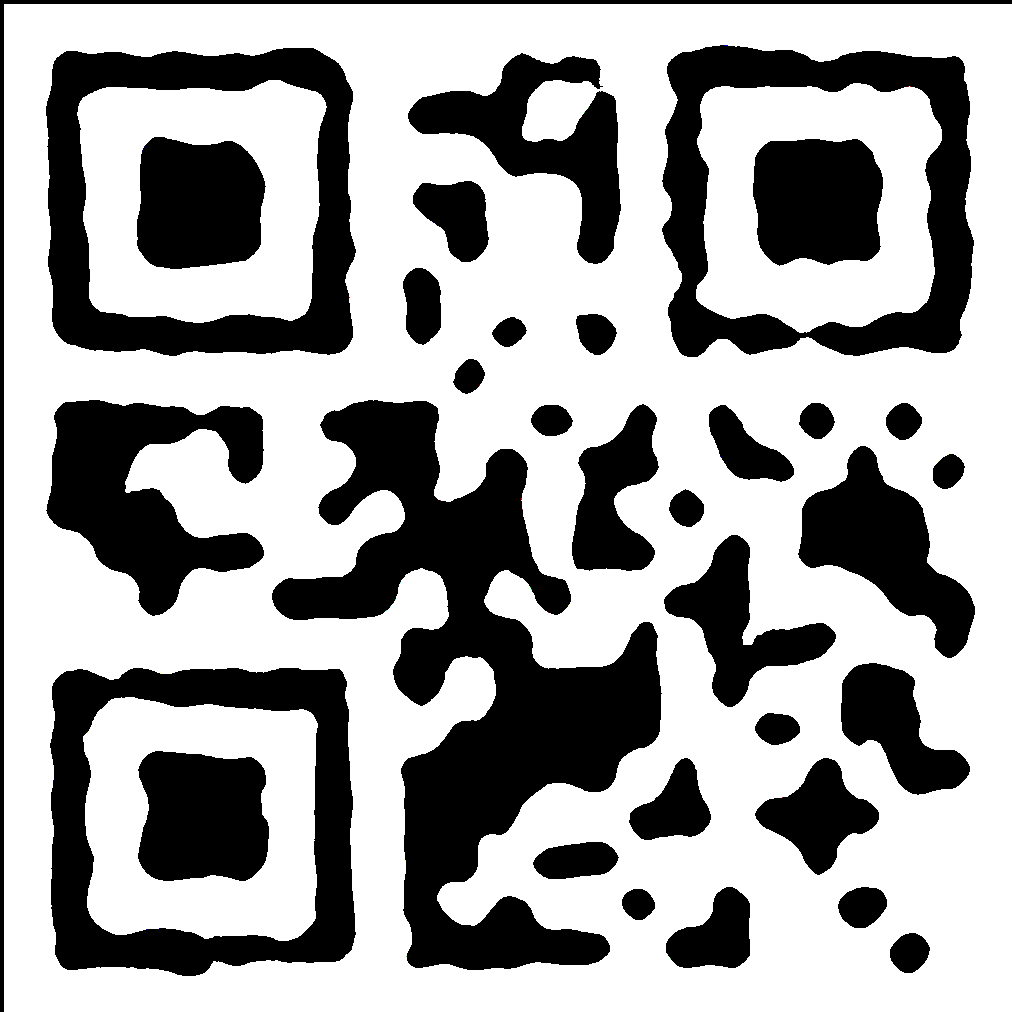

In [ ]:
# Apply dilation to enhance the features in the QR code
kernel = np.zeros((5,5), np.uint8)
dilated_img = cv2.dilate(thresh1, kernel, iterations=2)
cv2_imshow(dilated_img)

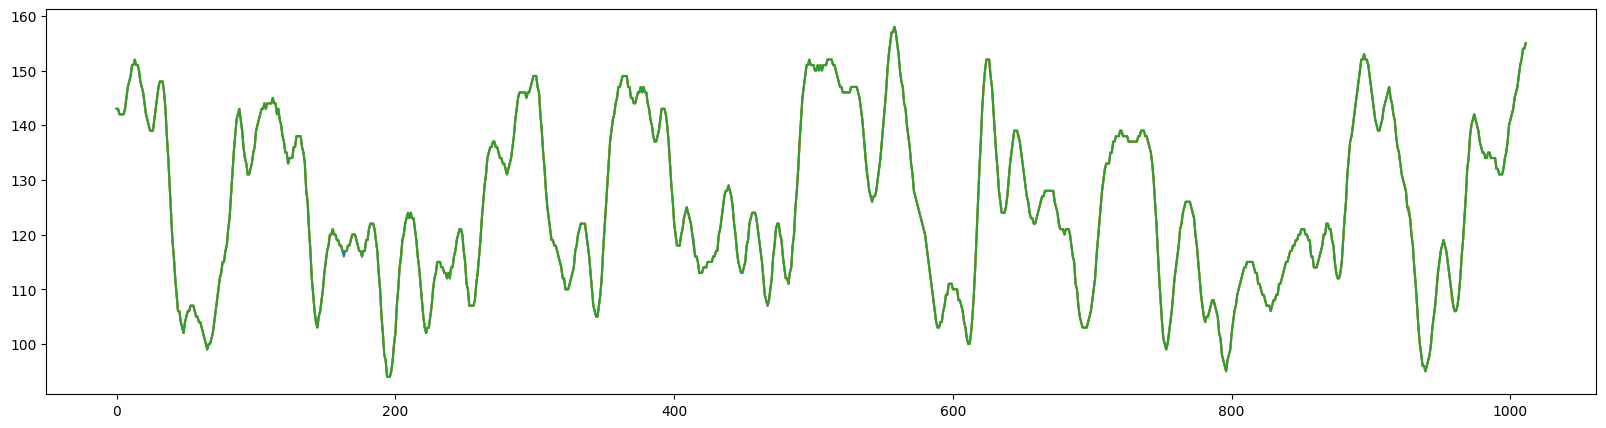

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(average_img[200])